In [1]:
#importing necessary packages
import pandas as pd
from pandas import Series
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf
import pmdarima as pm
series = pd.read_csv("C:\Code\D213\Task one\medical_time_series .csv", usecols = ['Day', 'Revenue'], index_col=0)
df = pd.read_csv("C:\Code\D213\Task one\medical_time_series .csv")

In [2]:
#viewing data
series.head()

,Revenue
Day,
1,0.000000
2,-0.292356
3,-0.327772
4,-0.339987
5,-0.124888


In [3]:
#getting length of data
len(series)

731

In [4]:
#creating first line plot of realization
def plot_df(series, x, y, title="Plot", xlabel='Day', ylabel='Revenue'):
    plt.figure(figsize=(16,5))
    plt.plot(x,y)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

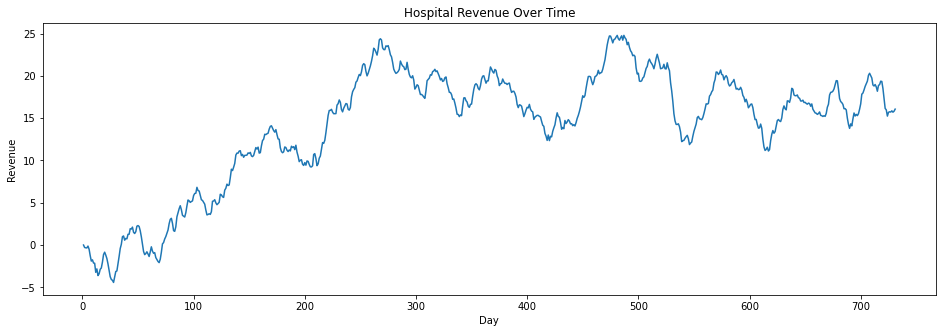

In [5]:
#viewing plot
x = df['Day']
y = df['Revenue']
plot_df(df, x=x, y=y, title='Hospital Revenue Over Time')

In [6]:
#ad fuller test for stationarity
result = adfuller(x)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value)) 

ADF Statistic: 18.493021
p-value: 1.000000
Critical Values:
	1%: -3.439
	5%: -2.866
	10%: -2.569


C:\Users\pesar\anaconda3_attempt2\lib\site-packages\statsmodels\regression\linear_model.py:903: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2


test statistic is above the critical value and p-value is 1.0 (data is not stationary)

taking the difference of data to make it stationary 

In [7]:
#importing package
from pmdarima.arima.utils import ndiffs

In [8]:
#getting number of differences to use 
ndiffs(y, test='adf') 

1

In [9]:
#creating the difference column
df['diff_1'] = df['Revenue'].diff()

In [10]:
diff_1 = df['diff_1']

In [11]:
#dropping null value
differenced_data = df['diff_1']
size = len(differenced_data)
differenced_data = differenced_data[1:size]

In [12]:
#testing stationarity of data again
result = adfuller(differenced_data)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value)) 

ADF Statistic: -17.374772
p-value: 0.000000
Critical Values:
	1%: -3.439
	5%: -2.866
	10%: -2.569


test statistic is below critical value, indicating data is stationary

In [13]:
X = differenced_data.values

In [14]:
size = int(len(X) * 0.66)
train, test = X[1:size], X[size:len(X)]

In [15]:
#exporting cleaned data 
df.to_csv('time_series_data.csv')

In [16]:
#creating seasonal decompose object 
decomp = sm.tsa.seasonal_decompose(train, model ='additive', period = 30)

Y_train

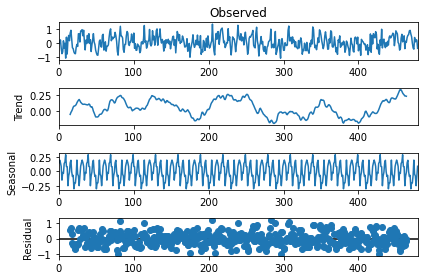

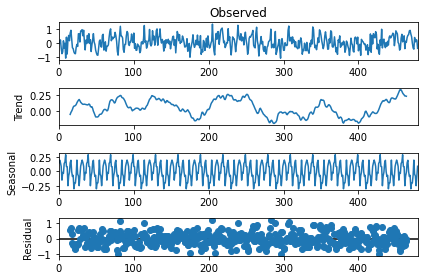

In [17]:
decomp.plot()

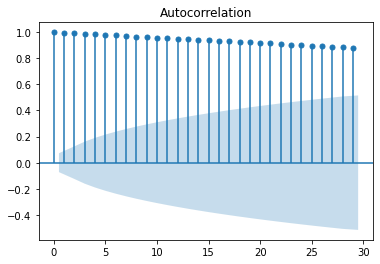

In [18]:
#plotting autocorrelation function
plot_acf(x)
plt.show()

In [19]:
#getting value for ACF
sm.tsa.acf(x, nlags = 30)

C:\Users\pesar\anaconda3_attempt2\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


array([1.        , 0.99589603, 0.9917921 , 0.98768822, 0.98358444,
       0.97948078, 0.97537727, 0.97127395, 0.96717084, 0.96306798,
       0.9589654 , 0.95486312, 0.95076118, 0.94665961, 0.94255844,
       0.9384577 , 0.93435742, 0.93025763, 0.92615836, 0.92205965,
       0.91796152, 0.913864  , 0.90976713, 0.90567093, 0.90157545,
       0.89748069, 0.89338671, 0.88929353, 0.88520117, 0.88110968,
       0.87701907])

(array([1.52612936e+04, 8.12118786e+03, 2.62760550e+02, 1.24454986e+02,
        5.40026379e+01, 2.55196420e+01, 2.89237553e+01, 6.29449800e+00,
        8.38967529e+00, 8.79735213e+00, 3.26244345e+00, 5.16464998e+00,
        4.64370619e+00, 1.96867736e+00, 1.48167320e+00, 2.11256649e+00,
        1.08550271e+00, 5.81988645e-01, 2.76744723e+00, 2.22308983e+00,
        5.50876230e-01, 7.49752606e-01, 1.26157210e+00, 8.77859381e-01,
        4.84404330e-01, 4.39565525e-01, 2.05055025e-01, 9.50457901e-01,
        5.23499207e-01, 4.35456489e-01, 1.69884060e+00, 8.97977002e-01,
        7.28275718e-01, 6.11527179e-01, 1.49053313e+00, 5.44383887e-01,
        2.17350902e-01, 5.07814496e-01, 4.43820257e-01, 2.94184611e-01,
        2.55373626e-01, 9.44702588e-02, 1.58619217e-01, 1.88829134e-01,
        2.11804293e-01, 6.04121179e-01, 4.95073852e-01, 2.15698285e-01,
        1.04432711e-01, 1.46393379e-01, 2.07457981e-01, 1.26602668e-01,
        1.74592665e-01, 1.42674366e-01, 9.63196690e-02, 1.177682

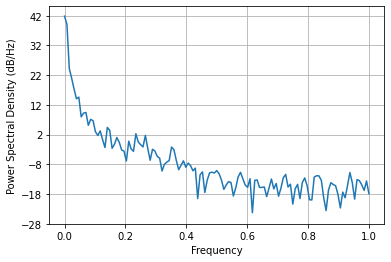

In [20]:
#viewing power spectral density
plt.psd(y)

In [21]:
X = series.values

In [22]:
#creating arima model
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,1))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))


C:\Users\pesar\anaconda3_attempt2\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


predicted=24.271272, expected=24.224075
predicted=24.142500, expected=24.504853
predicted=24.694273, expected=24.737544
predicted=24.915479, expected=24.223813
predicted=24.023430, expected=24.792249
predicted=24.965794, expected=24.502237
predicted=24.524667, expected=24.325106
predicted=24.219304, expected=23.685281
predicted=23.477716, expected=23.966679
predicted=24.099188, expected=23.378146
predicted=23.284224, expected=22.971797
predicted=22.759564, expected=22.779639
predicted=22.749419, expected=22.381915
predicted=22.288384, expected=22.455409
predicted=22.475523, expected=22.301887
predicted=22.288477, expected=20.937091
predicted=20.394919, expected=20.229346
predicted=19.873967, expected=20.317481
predicted=20.474025, expected=19.386424
predicted=19.122720, expected=19.347150
predicted=19.209987, expected=19.419523
predicted=19.479615, expected=19.749939
predicted=19.866130, expected=19.885123
predicted=19.902429, expected=20.395615
predicted=20.542346, expected=20.887586


In [23]:
#exporting cleaned data 
predictions_df = pd.DataFrame(data = predictions)
predictions_df.to_csv('predictions.csv')

In [24]:
#viewing model summary
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  729
Model:                 ARIMA(5, 1, 1)   Log Likelihood                -432.872
Method:                       css-mle   S.D. of innovations              0.438
Date:                Fri, 25 Feb 2022   AIC                            881.744
Time:                        17:13:39   BIC                            918.477
Sample:                             1   HQIC                           895.917
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0210      0.032      0.653      0.514      -0.042       0.084
ar.L1.D.y      0.9904      0.201      4.928      0.000       0.597       1.384
ar.L2.D.y     -0.2004      0.097     -2.060      0.039      -0.391      -0.010
ar.L3.D.y     -0.1051      0.053     -1.992      0.046      -0.209      -0.002
ar.L4.D.y      0.0687      0.056      1.224      0.221      -0.041       0.179
ar.L5.D.y      0.0369      0.042      0.875      0.382      -0.046       0.120
ma.L1.D.y     -0.5844      0.198     -2.947      0.003      -0.973      -0.196
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2501           -0.0000j            1.2501           -0.0000
AR.2            0.9892           -1.2436j            1.5891           -0.1431
AR.3            0.9892           +1.2436j            1.5891            0.1431
AR.4           -2.5441           -1.4520j            2.9293           -0.4175
AR.5           -2.5441           +1.4520j            2.9293            0.4175
MA.1            1.7111           +0.0000j            1.7111            0.0000
-----------------------------------------------------------------------------
"""

In [25]:
#testing model accuracy 
from sklearn.metrics import r2_score
r2_score(predictions, test)

0.9784033794880524

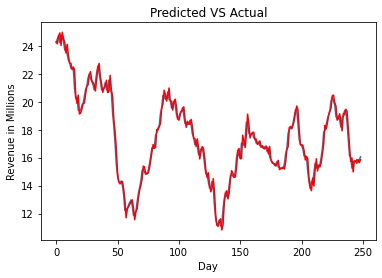

In [26]:
# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.gca().set(title='Predicted VS Actual', xlabel='Day', ylabel='Revenue in Millions')
plt.show()